# Imports

In [1]:
import numpy as np
np.random.seed(1)
import random
random.seed(1)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
if not os.path.exists('results'):
    os.makedirs('results')

# Bayesian Ridge

In [5]:
clf = BayesianRidge()
clf

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [6]:
train = pd.read_csv('../feature_engineering/train.gz')
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [7]:
test = pd.read_csv('../feature_engineering/test.gz')
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

## Grid Search

In [8]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)
cv

KFold(n_splits=3, random_state=1, shuffle=True)

In [9]:
params = {
    "n_iter": [int(1**x) for x in range(1, 8)],
    "alpha_1": [1**x for x in range(-6, 7)],
    "alpha_2": [1**x for x in range(-6, 7)],
    "lambda_1": [1**x for x in range(-6, 7)],
    "lambda_2": [1**x for x in range(-6, 7)],
}

In [10]:
grid = EvolutionaryAlgorithmSearchCV(
    estimator=clf, 
    params=params, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=4, 
    population_size=10,
    gene_mutation_prob=0.10,
    gene_crossover_prob=0.5,
    tournament_size=3,
    generations_number=15,
    verbose=1,
)
grid

EvolutionaryAlgorithmSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
               error_score='raise',
               estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
               fit_params={}, gene_crossover_prob=0.5,
               gene_mutation_prob=0.1, gene_type=None,
               generations_number=15, iid=True, n_jobs=4,
               params={'n_iter': [1, 1, 1, 1, 1, 1, 1], 'alpha_1': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1], 'alpha_2': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1], 'lambda_1': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1], 'lambda_2': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1]},
               population_size=10, refit=True,
               scoring='neg_mean_squared_error', tournament_size=3,
               verbose=1)

In [11]:
_ = grid.fit(X_train, y_train)

Types [1, 2, 2, 2, 2] and maxint [6, 12, 12, 12, 12] detected
--- Evolve in 199927 possible combinations ---
gen	nevals	avg     	min     	max     	std
0  	10    	-136.161	-136.161	-136.161	0  
1  	6     	-136.161	-136.161	-136.161	0  
2  	5     	-136.161	-136.161	-136.161	0  
3  	3     	-136.161	-136.161	-136.161	0  
4  	9     	-136.161	-136.161	-136.161	0  
5  	7     	-136.161	-136.161	-136.161	0  
6  	9     	-136.161	-136.161	-136.161	0  
7  	5     	-136.161	-136.161	-136.161	0  
8  	6     	-136.161	-136.161	-136.161	0  
9  	3     	-136.161	-136.161	-136.161	0  
10 	4     	-136.161	-136.161	-136.161	0  
11 	7     	-136.161	-136.161	-136.161	0  
12 	4     	-136.161	-136.161	-136.161	0  
13 	0     	-136.161	-136.161	-136.161	0  
14 	5     	-136.161	-136.161	-136.161	0  
15 	3     	-136.161	-136.161	-136.161	0  
Best individual is: {'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lambda_1': 1, 'lambda_2': 1.0}
with fitness: -136.16146970638306


In [12]:
best = pd.Series(grid.best_params_)
best.to_csv('results/br-params.csv')
best

alpha_1     1.0
alpha_2     1.0
lambda_1    1.0
lambda_2    1.0
n_iter      1.0
dtype: float64

In [13]:
results = grid.cv_results_
df = pd.DataFrame(results)
df.to_csv('results/br-grid.csv')
df

,index,max_test_score,mean_test_score,min_test_score,nan_test_score?,param_index,params,std_test_score
0,11,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1.0, 'alpha_2': 1, 'l...",0.0
1,12,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1.0, 'l...",0.0
2,13,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
3,14,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
4,15,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1.0, 'alpha_2': 1.0, ...",0.0
5,16,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
6,18,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
7,19,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
8,20,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0
9,21,-136.16147,-136.16147,-136.16147,False,0,"{'n_iter': 1, 'alpha_1': 1, 'alpha_2': 1, 'lam...",0.0


# Testing

In [14]:
clf = BayesianRidge(**grid.best_params_)
clf

BayesianRidge(alpha_1=1, alpha_2=1, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1, lambda_2=1.0, n_iter=1,
       normalize=False, tol=0.001, verbose=False)

In [15]:
clf.fit(X_train, y_train)

BayesianRidge(alpha_1=1, alpha_2=1, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1, lambda_2=1.0, n_iter=1,
       normalize=False, tol=0.001, verbose=False)

## Training Accuracy

In [16]:
train_pred = clf.predict(X_train)

In [17]:
train_err = mean_squared_error(y_train, train_pred)
train_err

135.86045158829234

In [18]:
train_df = pd.DataFrame([y_train, train_pred], index=['Truth', 'Predictions']).T

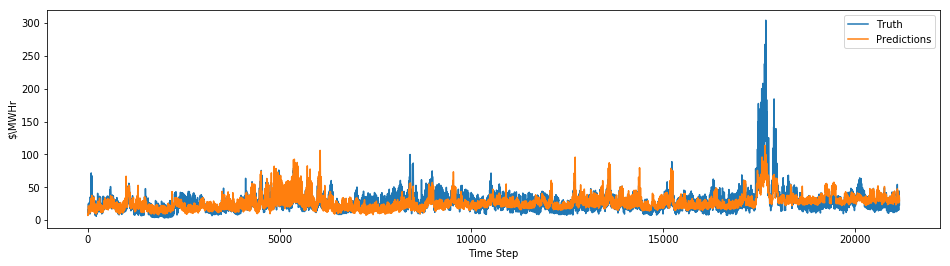

In [19]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/br-train.pdf')
plt.savefig('results/br-train.svg')

## Testing Accuracy

In [20]:
test_pred = clf.predict(X_test)

In [21]:
test_err = mean_squared_error(y_test, test_pred)
test_err

87.5022207936444

In [22]:
test_df = pd.DataFrame([y_test, test_pred], index=['Truth', 'Predictions']).T

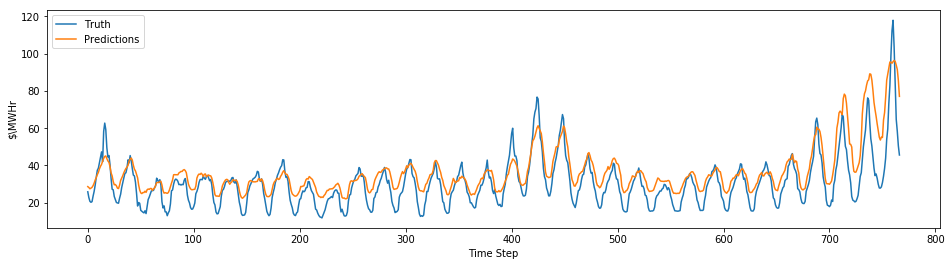

In [23]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/br-test.pdf')
plt.savefig('results/br-test.svg')

## Results

In [24]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    135.860452
Test      87.502221
dtype: float64

In [25]:
results.to_csv('results/br-mse.csv')